## Formål:
Kort dokumentere data, forbehandling og en enkel EDA (exploratory data analysis) som grunnlag for Streamlit-appen.

## App:
Interaktiv visning finnes i ´main.py´

## Data:
Fil: ´open-meteo-subset.csv´(i prosjektroten)
Kilde: Open-Meteo (subset for 2020)
Viktig variabler: `temperature_2m (°C)`, `precipitation (mm)`, `wind_speed_10m`, `wind_gusts_10m`, `wind_direction_10m (°)`
Tidsoppløsning: Timesverdier
I analysen under bruker vi **første måned** (~744, rader 0-743)

In [4]:
import pandas as pd
import re

# Les relativt (slik at notebooken funker for andre også)
df = pd.read_csv("open-meteo-subset.csv")

# Tolk første kolonne som tid
time_col = df.columns[0]
df[time_col] = pd.to_datetime(df[time_col], errors="coerce")

# Første måned: 0..743 (≈ 31*24)
df_month = df.iloc[:744].copy()

df_month.head()

,Time,Temperature_2m (°C),Precipitation (mm),Wind_speed_10m (m/s),Wind_gusts_10m (m/s),Wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


## Sanity checks
- Er tidskolonnen gyldig (ingen NaT)?
- Finnes alle forventede kolonner?
- Enkle nøkkeltall (min/snitt/maks) for første måned

In [5]:
print("Kolonner:", list(df.columns))
print("Tidsrom (hele datasettet):", df[time_col].min(), "→", df[time_col].max())
print("Antall rader totalt:", len(df), " | Første måned:", len(df_month))

# Min/snitt/maks for første måned (alle numeriske variabler)
stats = (df_month.iloc[:, 1:]
         .agg(["min", "mean", "max"])
         .T.rename(columns={"min": "Min", "mean": "Snitt", "max": "Maks"}))
stats.round(2)

Kolonner: ['Time', 'Temperature_2m (°C)', 'Precipitation (mm)', 'Wind_speed_10m (m/s)', 'Wind_gusts_10m (m/s)', 'Wind_direction_10m (°)']
Tidsrom (hele datasettet): 2020-01-01 00:00:00 → 2020-12-30 23:00:00
Antall rader totalt: 8760  | Første måned: 744


,Min,Snitt,Maks
Temperature_2m (°C),-14.6,-4.40,2.4
Precipitation (mm),0.0,0.42,5.8
Wind_speed_10m (m/s),0.2,5.62,11.2
Wind_gusts_10m (m/s),0.4,12.65,25.3
Wind_direction_10m (°),0.0,230.37,356.0


## Rask EDA (første måned)
Vi ser kjalpt på temperatur og nedbør over tid, og et samlet vindbilde

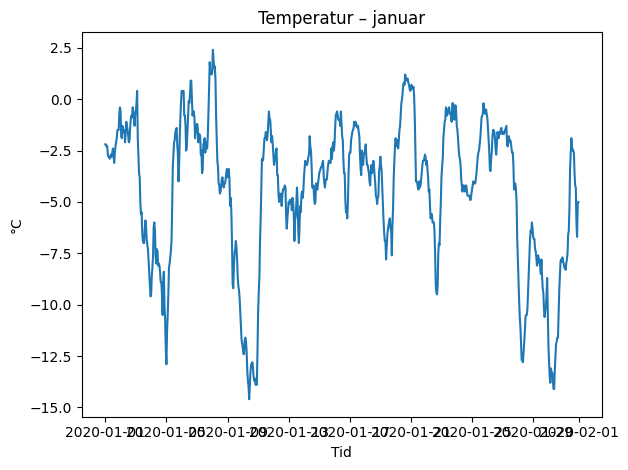

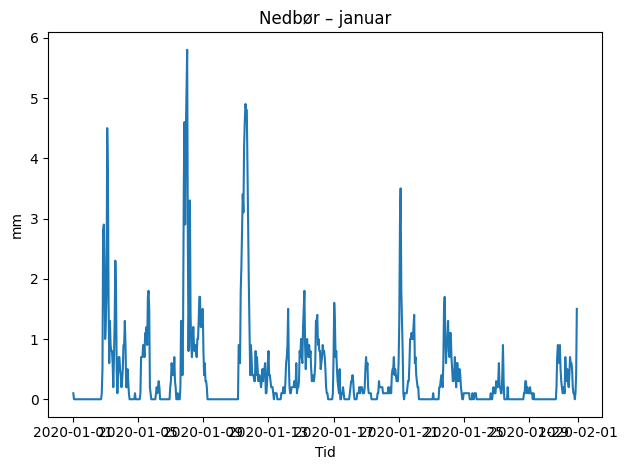

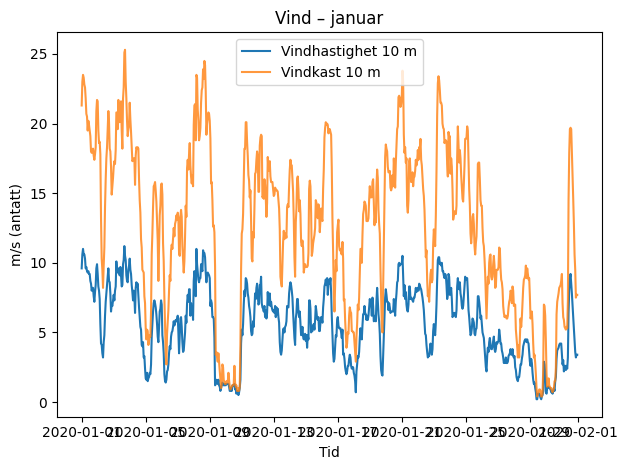

In [8]:
import matplotlib.pyplot as plt

# Temperatur
plt.figure()
plt.plot(df_month[time_col], df_month["Temperature_2m (°C)"])
plt.title("Temperatur – januar")
plt.xlabel("Tid"); plt.ylabel("°C")
plt.tight_layout(); plt.show()

# Nedbør
plt.figure()
plt.plot(df_month[time_col], df_month["Precipitation (mm)"])
plt.title("Nedbør – januar")
plt.xlabel("Tid"); plt.ylabel("mm")
plt.tight_layout(); plt.show()

# Vind (hastighet og vindkast sammen)
plt.figure()
plt.plot(df_month[time_col], df_month["Wind_speed_10m (m/s)"], label="Vindhastighet 10 m")
plt.plot(df_month[time_col], df_month["Wind_gusts_10m (m/s)"], label="Vindkast 10 m", alpha=0.8)
plt.title("Vind – januar")
plt.xlabel("Tid"); plt.ylabel("m/s (antatt)")
plt.legend()
plt.tight_layout(); plt.show()

In [9]:
def pretty(col):
    base = re.sub(r"\s*\([^)]*\)\s*$", "", col).replace("_"," ").strip()
    return base.capitalize()

## Funn (kort)
Værdata for januar

## Reproduserbarhet
** Lokalt:
```bash
pip install -r requirements.txt
streamlit run main.py

## AI-bruk
I dette prosjektet har jeg brukt en kombinasjon av ChatGPT og Copilot (tilhørende VS code). ChatGPT har bidratt med tolkning og løsning av feilmeldinger, og Copilot har bidratt med kodeforslag. Når det kommer til oppsett, installasjon av programmer og opprettelse av filer, så har jeg fått hjelp av en medelev i IND320 og en venninne med mer erfaring enn meg selv.

## Logg
Jeg startet med å laste ned VS code og opprettet main.py og ind320_notebook.ipynb. Dette lagret jeg under dokumenter i en mappe som jeg kaller IND320, med streamlit som undermappe. I denne mappen lastet jeg også ned open-meteo-subset.csv. Så lastet jeg ned IND320 mappen fra khliland sin Github, og åpent requirements.txt i min streamlit mappe, men fikk ikke noe innhold, så det skrev jeg manuelt, og deretter kjørte det i Terminal slik at det ble lastet ned. Har også fikset en README.md slik at nye brukere til min app enkelt skal kunne ta den i bruk. Lagde også en Lagde bruker på github og streamlit, lastet ned bilde (som vises på Hjem siden i appen), fikset layout og oppsett i appen og pushet til github slik at det er mulig å hente for andre. 